# Projeto 2

In [ ]:
# instalando depencias
!pip3 install numpy
!pip3 install matplotlib
!pip3 install scipy
!pip3 install pydub

In [2]:
# importando dependencias
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import math
import pydub
import time
from pydub import AudioSegment
from pydub.playback import play
from PIL import Image
from scipy import fftpack

## DCT

In [3]:
# DCT
def DCT1D(data):
    N = len(data)
    X = np.zeros(N)
    ak = math.sqrt(2.0/N)
    
    for k in range(N):
        ck = math.sqrt(1.0/2.0) if k == 0 else 1        
        s = 0
        
        for n in range(N):
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            two_n = 2.0 * N
            
            s += data[n] * math.cos((q/two_n) + (w/two_n))
        
        X[k] = ak * ck * s
    
    return X

## IDCT

In [4]:
def IDCT1D(data):
    N = len(data)
    x = np.zeros(N)
    
    ak = math.sqrt(2.0/N)
    
    for n in range(N):
        s = 0
        for k in range(N):
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            two_n = 2.0 * N
            ck = math.sqrt(1.0/2.0) if k == 0 else 1
                
            s += ck * data[k] * math.cos((q/two_n) + (w/two_n))
            
        x[n] = ak * s
    
    return x
    

### Testes DCT e IDCT

In [ ]:
x = np.array([5.9285,2.1515,0.4693,-0.5441,0.9595,3.6881,4.0156])

X_DCT = DCT1D(x)
X_IDCT = IDCT1D(X_DCT)

In [ ]:
x

In [ ]:
X_IDCT

# Audio

In [5]:
# Read Wav File
filename = "MaisUmaSemana.wav"
portion_slice = 2000
base = 20000
audio_rate, audio_data = wavfile.read("./" + filename)
# audio_portion = audio_data[base:base+portion_slice]
audio_portion = audio_data
audio_data.shape

(45498,)

In [6]:
# draw audio wave graph
def plot_audio_wave(data, figsize=[20,6], color="blue", y_label="Amplitude", stroke=0.5, title=""):
    plt.figure('Data', figsize=figsize)
    plt.plot(data, linewidth=stroke,alpha=1,color=color)
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

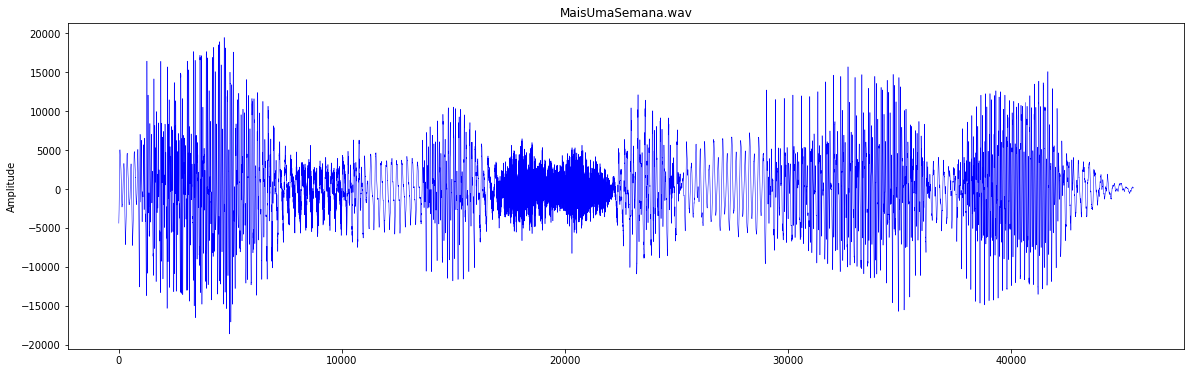

In [7]:
plot_audio_wave(audio_data, title=filename)
# plot_audio_wave(audio_portion, title="{} - {} Slice".format(filename, portion_slice))

## DCT AUDIO

In [8]:
print("DCT audio...")
inicio = time.time()
DCT = DCT1D(audio_portion)
fim = time.time()
print("DCT Done! - took {:3f} seconds" .format((fim - inicio)*1000.0))

DCT audio...
DCT Done! - took 5098691.232204 seconds


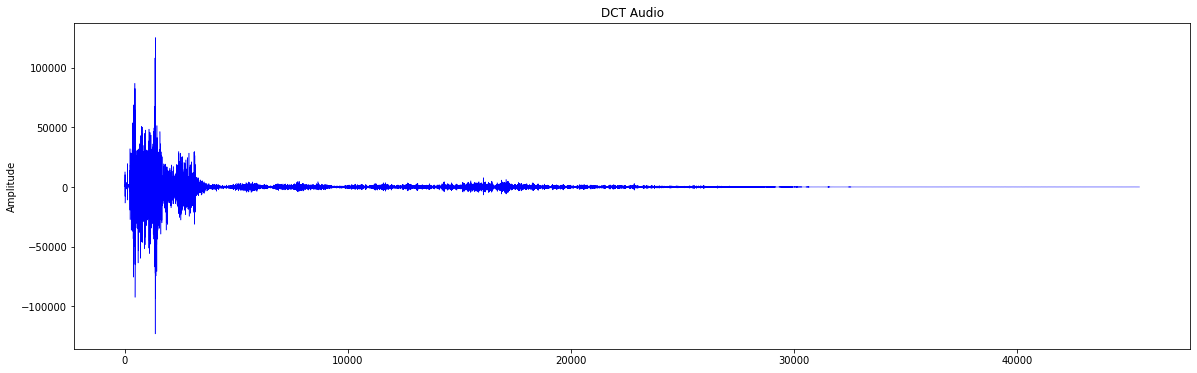

Nivel DC: 2183.6442487570853


In [9]:
plot_audio_wave(DCT, title="DCT Audio")
print("Nivel DC: {}".format(DCT[0]))

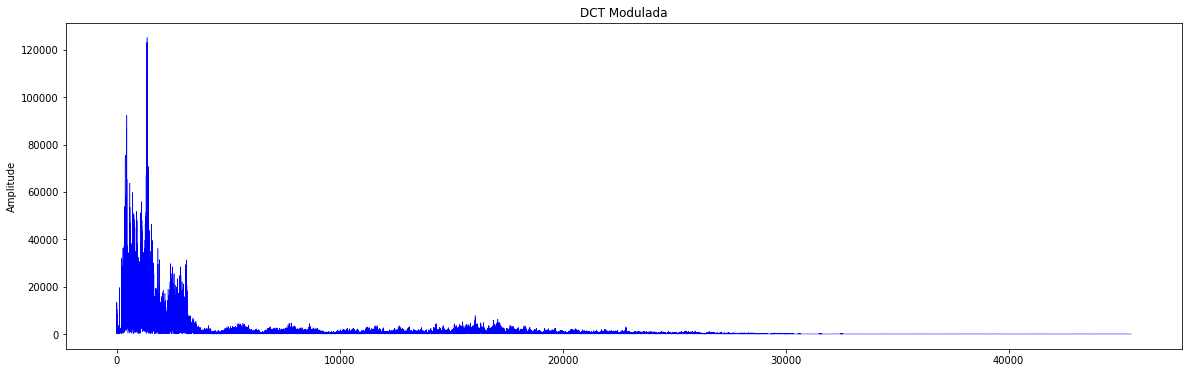

Numero de frequências desejadas?  5000


In [10]:
DCT_filtered = DCT.copy()
DCT_values = DCT_filtered.copy()
selected_frequencies = []

# Valores modulados
for i in range(len(DCT)):
    DCT_values[i] = abs(DCT_values[i])
    
plot_audio_wave(DCT_values, title="DCT Modulada")
num = int(input("Numero de frequências desejadas? "))

In [28]:
aux = DCT_values.copy()
aux_sorted = list(enumerate(aux))

def sortKey(e):
    return e[1]

aux_sorted.sort(key=sortKey)
aux_sorted = aux_sorted[::-1]

selected_frequencies = [aux_sorted[i][0] for i in range(num)]
selected_frequencies.insert(0, aux[0])

# freq_selecionadas

NameError: name 'DCT_values' is not defined

In [12]:
for i in range(len(DCT_filtered)):
    if i not in selected_frequencies:
        DCT_filtered[i] = 0
        
# print(freq_selecionadas)

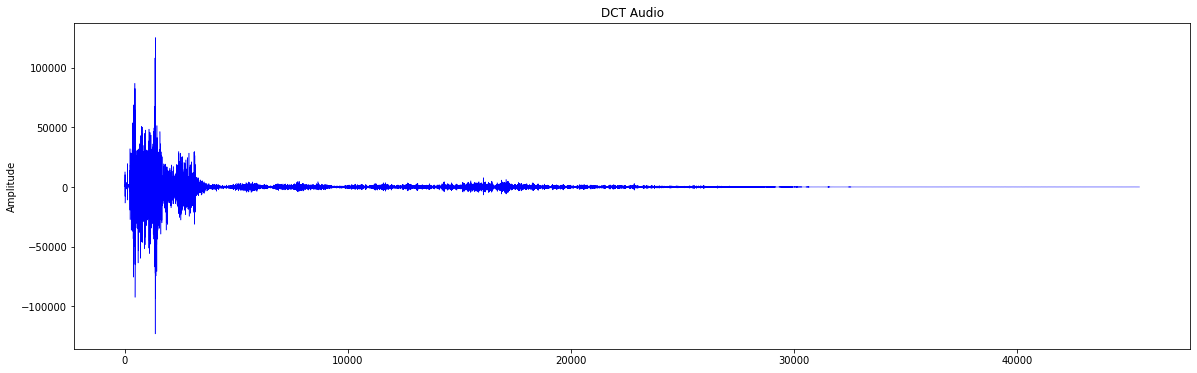

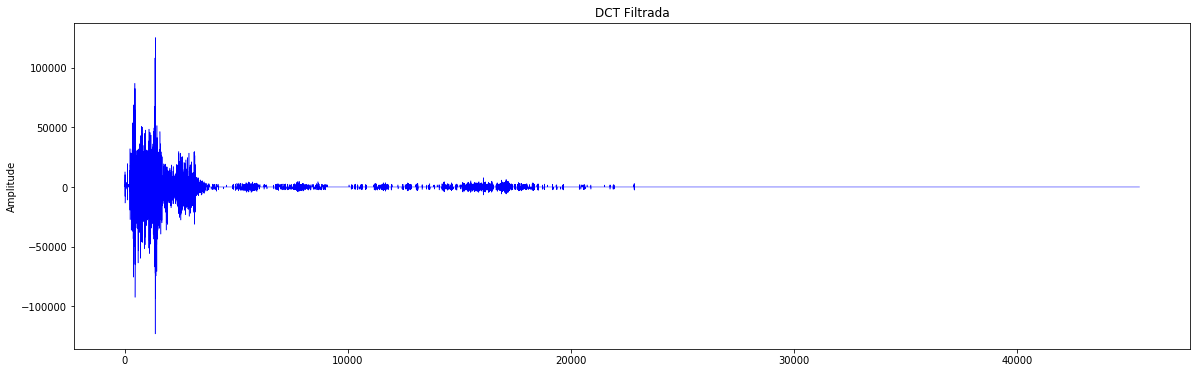

In [13]:
plot_audio_wave(DCT, title="DCT Audio")
plot_audio_wave(DCT_filtered, title="DCT Filtrada")

In [15]:
# IDCT
print("IDCT audio...")
inicio = time.time()
IDCT = IDCT1D(DCT_filtered)
fim = time.time()
print("IDCT Done! - took {:3f} seconds" .format((fim - inicio)))


IDCT audio...
IDCT Done! - took 1932.608715 seconds


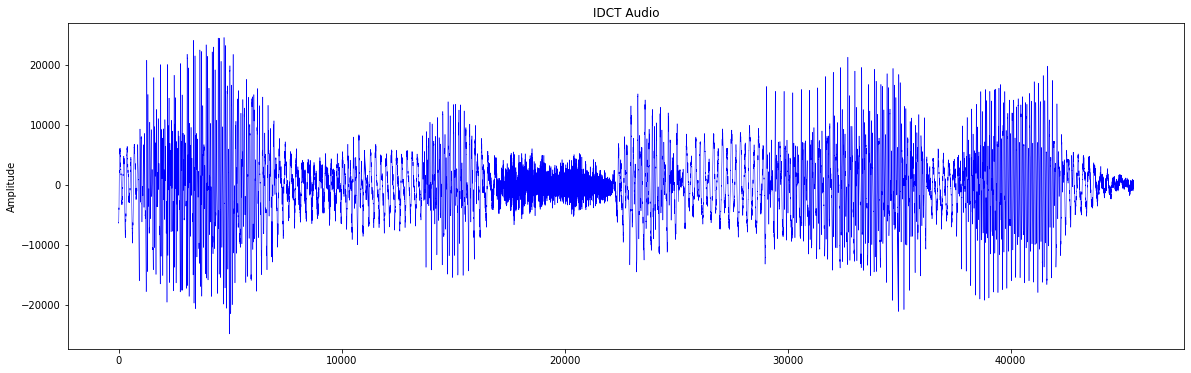

In [18]:
plot_audio_wave(IDCT, title="IDCT Audio")

In [9]:

# audio_tranformado = IDCT1D(DCT)
# audio_tranformado = fftpack.idct(DCT_filtered, norm="ortho")
audio_tranformado = IDCT
audio_tranformado *= 1.3
audio_tranformado = audio_tranformado.astype("int16")

wavfile.write("IDCT3.wav", audio_rate, audio_tranformado)

NameError: name 'IDCT' is not defined

# DCT Imagem

In [95]:
imagem = Image.open("lena.bmp")
imagem = np.asarray(imagem)

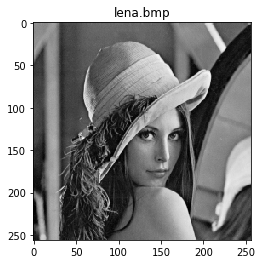

In [96]:
plt.imshow(imagem, cmap="gray")
plt.title("lena.bmp")
plt.show()

In [98]:
imgDCT = np.zeros(imagem.shape)

inicio = time.time()
# aplicar DCT verticalmente
for i, linha in enumerate(imagem):
    imgDCT[i] = DCT1D(linha)
#     imgDCT[i] = fftpack.dct(linha)
    
imgDCT = imgDCT.T
# Aplica DCT nas colunas
for i, linha in enumerate(imgDCT):
    imgDCT[i] = DCT1D(linha)
#     imgDCT[i] = fftpack.dct(linha)

fim = time.time()
print("DCT Levou: {} segundos".format((fim - inicio)))

DCT Levou: 66.40872836112976 segundos


In [99]:
imgDCT = imgDCT.T
img_dc = imgDCT[0][0]
print("Nivel DC: {}".format(imgDCT[0][0]))

Nivel DC: 25261.12890625001


Text(0.5, 1.0, 'Com DC')

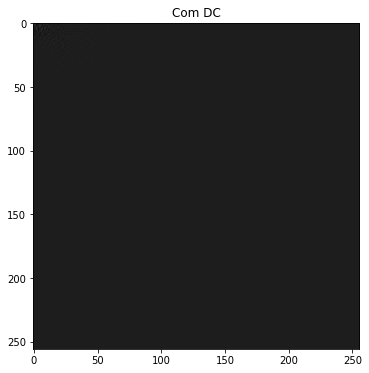

In [100]:
plt.figure(figsize=[80,6])
plt.imshow(imgDCT, cmap="gray")
plt.title("Com DC")

Text(0.5, 1.0, 'SEM DC')

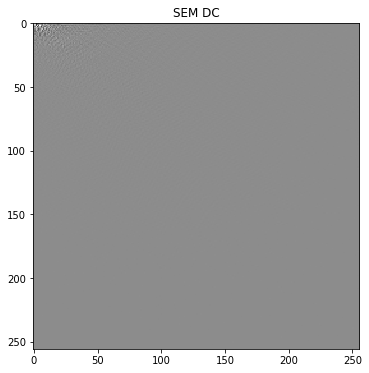

In [101]:
imgDCT[0][0] = 0
plt.figure(figsize=[60,6])
plt.imshow(imgDCT, cmap="gray")
plt.title("SEM DC")

# Normalização

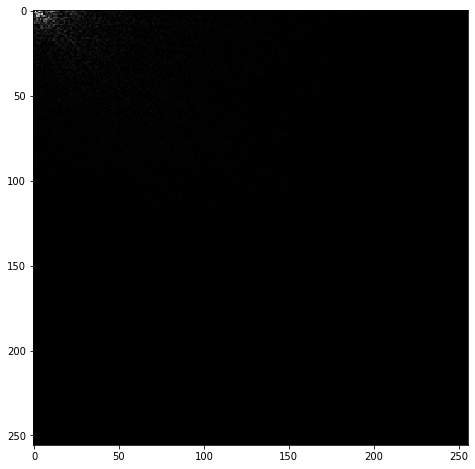

In [102]:
norm_img = imgDCT.copy()

for i in range(norm_img.shape[0]):
    for j in range(norm_img.shape[1]):
        norm_img[i][j] = abs(norm_img[i][j])

plt.figure(figsize=[80,8])
plt.imshow(norm_img, cmap="gray")


In [109]:
img_selected_freq = []
img_num = int(input("Numero de frequências? "))

Numero de frequências?  10


In [110]:
imgDCT_filtered = imgDCT.copy()
img_aux = imgDCT_filtered.copy()
img_aux_sorted =  list(np.ndenumerate(norm_img))

def sortKey(e):
    return e[1]


img_aux_sorted.sort(key=sortKey)
img_aux_sorted = img_aux_sorted[::-1]

img_selected_freq = [img_aux_sorted[i][0] for i in range(img_num)]
img_selected_freq.insert(0, (0,0))

In [111]:
for i in range(imgDCT_filtered.shape[0]):
    for j in range(imgDCT_filtered.shape[1]):
        if (i, j) not in img_selected_freq:
            imgDCT_filtered[i][j] = 0

# IDCT

In [112]:
imgIDCT = np.zeros(imagem.shape)

inicio = time.time()
for i, linha in enumerate(imgDCT_filtered):
#     imgIDCT[i] = fftpack.idct(linha)
    imgIDCT[i] = IDCT1D(linha)
    

imgIDCT_Trans = imgIDCT.T

for i, linha in enumerate(imgIDCT_Trans):
#     imgIDCT_Trans[i] = fftpack.idct(linha)
    imgIDCT_Trans[i] = IDCT1D(linha)
    
    
fim = time.time()
print("IDCT Levou: {} segundos".format((fim - inicio)))

imgIDCT = imgIDCT

IDCT Levou: 38.32147669792175 segundos


Text(0.5, 1.0, 'IDCT Imagem')

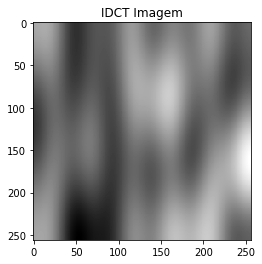

In [113]:
plt.imshow(imgIDCT, cmap="gray")
plt.title("IDCT Imagem")